In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

prioritycalls = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefilelatlong/dpdshapefilelatlong.shp')
prioritycalls = prioritycalls.loc[~(prioritycalls["X"] == 0) & ~(prioritycalls["Y"] == 0) & ~(prioritycalls["Cancelled"] != 0)].copy()
prioritycalls = prioritycalls.loc[prioritycalls["Source"] != "Self Initiated"]
priorprioritycalls = prioritycalls.loc[~(prioritycalls["Priority"] != "P")].copy()

print(prioritycalls.shape) 
prioritycalls.head(6)

(122803, 15)


,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (-78.81280 35.99886)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (-78.91562 35.99174)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (-78.87123 36.06210)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (-78.84478 35.93921)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (-78.87486 35.99818)
5,21000011,None,1/1/2021,12:04:08AM,Wireless 911 Call,3,SUSPICIOUS PERSON,100 LANDSBURY DR,2007390,806379,D3,321,Resolved Without Report,0,POINT (-78.97502 35.96561)


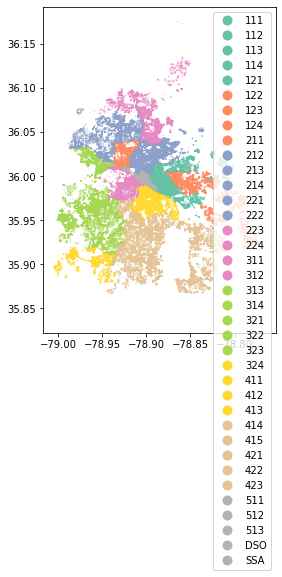

In [11]:
prioritycalls.plot(column='Beat', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.05, 
                         cmap="Set2", aspect=1);

In [12]:
onlyppriorities = pd.DataFrame(priorprioritycalls.groupby("Beat").agg({'Event Numb':'count'}))
onlyppriorities.rename(columns=({'Event Numb':'Count_of_Pcalls'}),inplace = True)
onlyppriorities.head()

,Count_of_Pcalls
Beat,
111,244
112,230
113,290
114,195
121,214


In [13]:
allpriorities = pd.DataFrame(prioritycalls.groupby("Beat").agg({'Event Numb':'count'}))
allpriorities.rename(columns=({'Event Numb':'Count_of_calls'}),inplace = True)
allpriorities.head()

,Count_of_calls
Beat,
111,7592
112,8465
113,8360
114,6271
121,6138


In [14]:
# prioritycalls['Pcall'] = np.where(prioritycalls['Priority']!= '[P]', True, False)
# prioritycalls.groupby('Beat')['Beat']
# prioritycalls['propofpcalls']= prioritycalls['Pcall']
# prioritycalls.head()

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry,Pcall,propofpcalls
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (-78.81280 35.99886),True,True
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (-78.91562 35.99174),True,True
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (-78.87123 36.06210),True,True
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (-78.84478 35.93921),True,True
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (-78.87486 35.99818),True,True


In [16]:
bothtypes = pd.concat([allpriorities, onlyppriorities], axis = 1)
print(bothtypes)

      Count_of_calls  Count_of_Pcalls
Beat                                 
111             7592            244.0
112             8465            230.0
113             8360            290.0
114             6271            195.0
121             6138            214.0
122             8962            318.0
123             5745            211.0
124             3857            160.0
211             7393            308.0
212             5832            208.0
213             7389            260.0
214             7163            313.0
221             8262            345.0
222             7128            270.0
223            14274            447.0
224             6054            231.0
311             4991            184.0
312             6321            226.0
313             9416            218.0
314            13102            246.0
321             7025            244.0
322             5415            147.0
323             6786            226.0
324             6782            245.0
411         